### Supervised Learning Final Project

This final project uses a dataset from a telemarketing campaign conducted 2008-2010 for a bank in Portugal selling Term Loan Certificates to their current customers. The target variable is if the customers contacted choose to subscribe to the term deposit (1) or not (0). The features of this dataset are attributes of the potential subscribers like age, occupation, marital status as well as external factors like the unemployment rate at the time they were contactd by the telemarketers, the month of the year and others. 


Solving problems like this is potentially very useful to businesses so they can better tailor their marketing campaigns towards people that are more likely to buy their products. 

In [307]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Comment this out if you want to see the warnings
import warnings
warnings.simplefilter("ignore")

### Step 1: Load & Clean Data

Dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing) which also has a good description of each of the features.

Here we'll use the most recent, expanded version of the dataset - bank-additional-full

In [576]:
df = pd.read_csv('bank-additional-full.csv', delimiter = ';', header =0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [577]:
# format problematic job name 'admin.' to remove '.'
df['job'] = df['job'].apply(lambda x: x.replace('admin.', 'admin'))

# format target variable to numeric
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Missing values are encoded as 'unknown' in this dataset. Most features have few unknowns so we will drop the unknown values from the dataset.

The 'default' feature, which codes if the customer has ever defaulted on a bank payment, has 8597 'unknown' values and only three yes examples. This does not seem like a useful feature so we will drop it. Another feature 'duration' which encodes the durtaion of the call, is highly associated with the target variable where a 'duration' of 0 is always a 'no' result. So we will drop that column too. Note this was a suggestion on the UCI dataset home page for anyone trying to build a realistic model.

In [183]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [578]:
df = df.drop(['default', 'duration'], axis=1)

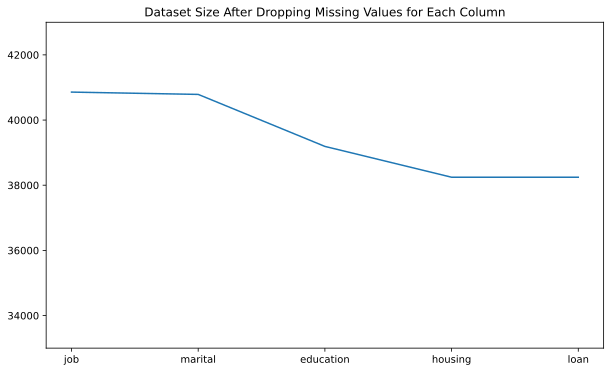

In [579]:
drop_unknown_cols = ['job', 'marital', 'education', 'housing', 'loan']

df_length = []

for col in drop_unknown_cols:
    df = df[df[col]!='unknown']
    df_length.append(len(df))
    
plt.figure(figsize=(10,6))
plt.title('Dataset Size After Dropping Missing Values for Each Column')
plt.plot(drop_unknown_cols, df_length)
plt.ylim(33000,43000)
plt.show()

In [381]:
# No more 'unknown' values for any feature

for col in df.columns:
    print(len(df[df[col]=='unknown']))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### Part 2: EDA

Our final dataset has 38245 examples with 18 features. Our target variable 'y' is imbalanced in that only 4258 examples subscribed to the loan.

 Final Dataset has 38245 examples with 18 features.


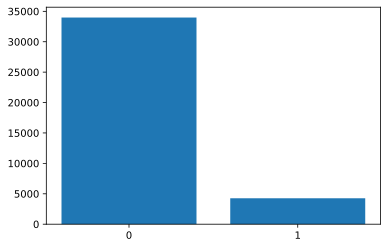

In [382]:
print(f" Final Dataset has {len(df)} examples with {len(df.columns)-1} features.")

plt.bar(['0', '1'], df.y.value_counts().reset_index()['y']);

In [383]:
# Examine Mean of each numeric column for the target variable. The rest of the features are categorical.
df.groupby('y').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,
0,39.751140,2.630447,984.363286,0.131874,0.244852,93.597463,-40.625313,3.807377,5176.267270
1,40.736731,2.057539,797.255284,0.474401,-1.210146,93.353607,-39.869493,2.153996,5096.914702


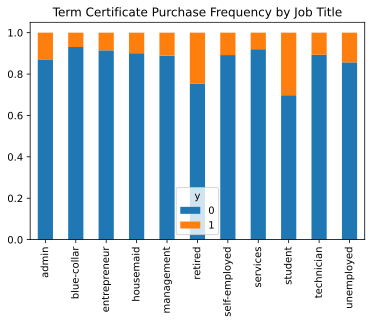

In [191]:
# 100% Stacked bar chart for job title

tab = pd.crosstab(df.job,df.y)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Term Certificate Purchase Frequency by Job Title')
plt.xlabel('')
plt.ylabel('');

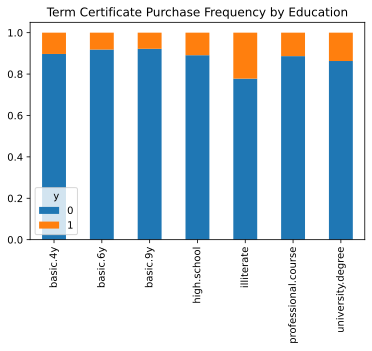

In [190]:
# 100% Stacked bar chart for education

tab = pd.crosstab(df.education,df.y)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Term Certificate Purchase Frequency by Education')
plt.xlabel('')
plt.ylabel('');

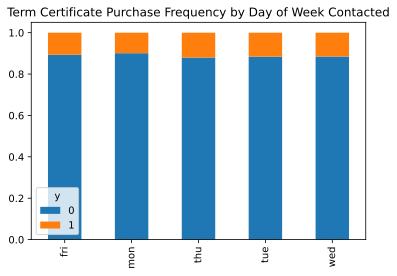

In [192]:
tab = pd.crosstab(df.day_of_week,df.y)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Term Certificate Purchase Frequency by Day of Week Contacted')
plt.xlabel('')
plt.ylabel('');

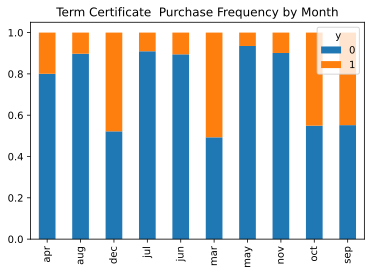

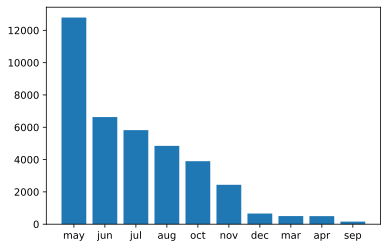

In [193]:
tab = pd.crosstab(df.month,df.y)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Term Certificate  Purchase Frequency by Month')
plt.xlabel('')
plt.ylabel('')
plt.show()

plt.bar(df.month.unique(), df.month.value_counts().reset_index()['month'])
plt.show()

#### One-Hot encode Categorical Variables

Many of the features are categorical variables, so we will want to convert them to numeric through one-hot encoding. Essentially for every categorical variable, it creates new columns for each category and encodes it as a 0 or 1. The follwing cell shows an example for the 'job' feature and then we will do the same for the entire dataset. 

In [105]:
dummies = pd.get_dummies(df['job'], prefix = 'job')
dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [580]:
# For each categorical variable
cat_vars = ['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']

for cat_var in cat_vars:
    dummies = pd.get_dummies(df[cat_var], prefix = cat_var, dtype='int64')
    df = pd.concat([df , dummies], axis=1)

# drop original columns
df = df.drop(cat_vars, axis=1)

print(df.columns)

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_none

### Part 3: Modeling

First we'll create train/test splits on the Data.

Because we have a fairly large dataset of examples we'll use 20% of the data for a test set.

In [581]:
from sklearn.metrics import f1_score, recall_score
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler, MaxAbsScaler, normalize
from sklearn.pipeline import make_pipeline

y = df['y']
X = df.drop('y', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print(f"{len(X_train)} training examples and {len(y_test)} test examples")

30596 training examples and 7649 test examples


### Part 3: Modeling

I'm looking at different Normalization routines and how they apply to the dataset in different contexts. You can read more about the different normalization or Scaling routines in the [scikit-learn docs](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

### Part 3a: Logistic Regression Classifier in Sklearn

In [583]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier Without Normalization
print(" -- Logistic Regression Without Normalization / Scaling -- ")
lrc = LogisticRegression(max_iter=1000)
lrc.fit(X_train,  y_train)
y_test_pred = lrc.predict(X_test)
print(f"No Scaling or Normalization Accuracy: {lrc.score(X_test, y_test):.5}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

print(" -- Logistic Regression With Normalization / Scaling -- ")
for p in [Normalizer(), StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler(), QuantileTransformer(), PowerTransformer()]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    pipe = make_pipeline(p, LogisticRegression(max_iter=10000))
    pipe.fit(X_train, y_train)  # apply scaling on training data
    transformer = p.fit(X_train) 
    transformer.transform(X_test) # apply scaling learned on train data to test data
    y_test_pred = pipe.predict(X_test)
    print(f"{str(p)[:-2]} Accuracy: {pipe.score(X_test, y_test):.5}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

 -- Logistic Regression Without Normalization / Scaling -- 
No Scaling or Normalization Accuracy: 0.89816, f1_score: 0.32320, recall: 0.2181
 -- Logistic Regression With Normalization / Scaling -- 
Normalizer Accuracy: 0.89567, f1_score: 0.28495, recall: 0.1864
StandardScaler Accuracy: 0.89829, f1_score: 0.32699, recall: 0.2216
RobustScaler Accuracy: 0.89829, f1_score: 0.32230, recall: 0.2169
MinMaxScaler Accuracy: 0.89842, f1_score: 0.32140, recall: 0.2157
MaxAbsScaler Accuracy: 0.89672, f1_score: 0.30212, recall: 0.2005
QuantileTransformer Accuracy: 0.89737, f1_score: 0.30469, recall: 0.2016
PowerTransformer Accuracy: 0.89803, f1_score: 0.32642, recall: 0.2216


#### Best Logistic Regression Model

Using Standard Scaler normalization

In [520]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))
# apply scaling on training data
pipe.fit(X_train, y_train)  
transformer = StandardScaler().fit(X_train) 
# apply scaling learned on train data to test data
transformer.transform(X_test)
y_test_pred = pipe.predict(X_test)
y_train_predict = pipe.predict(X_train)

print(f"Logistic Regression Model with StandardScaler Train Set Accuracy Score: {pipe.score(X_train, y_train_predict):.5f}, f1_score: {f1_score(y_train, y_train_predict):.5f}, recall: {recall_score(y_train, y_train_predict):.4f}")
print(f"Logistic Regression Model with StandardScaler Test Set Accuracy Score: {pipe.score(X_test, y_test):.5f}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

Logistic Regression Model with StandardScaler Train Set Accuracy Score: 1.00000, f1_score: 0.34667, recall: 0.2341
Logistic Regression Model with StandardScaler Test Set Accuracy Score: 0.89829, f1_score: 0.32699, recall: 0.2216


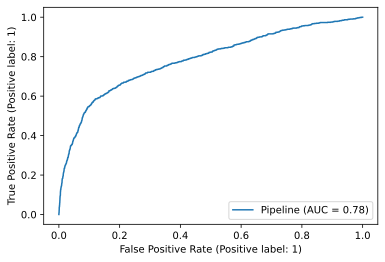

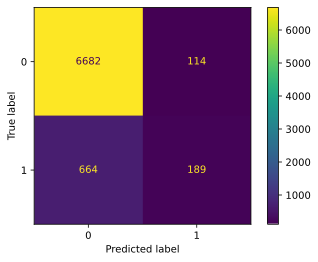

In [521]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

RocCurveDisplay.from_estimator(pipe, X_test, y_test)
plt.show()

ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test);

### Part 3b: Decision Tree Classifier

In [464]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Decision Tree Classifier No SCaling
print(" -- Decision Tree Classifier Without Normalization or Scaling -- ")
dtc = DecisionTreeClassifier(random_state=12)
dtc.fit(X_train,  y_train)
y_test_pred = dtc.predict(X_test)
print(f"No Scaling Accuracy: {dtc.score(X_test, y_test):.5}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

print(" -- Decision Tree Classifier With Scaling -- ")
for p in [Normalizer(), StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler(), QuantileTransformer(), PowerTransformer()]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    pipe = make_pipeline(p, DecisionTreeClassifier(random_state=12))
    pipe.fit(X_train, y_train)  # apply scaling on training data
    transformer = p.fit(X_train) 
    transformer.transform(X_test) # apply scaling learned on train data to test data
    y_test_pred = pipe.predict(X_test)
    print(f"{str(p)[:-2]} Accuracy: {pipe.score(X_test, y_test):.5}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

 -- Decision Tree Classifier Without Normalization or Scaling -- 
No Scaling Accuracy: 0.869, f1_score: 0.31370, recall: 0.2685
 -- Decision Tree Classifier With Scaling -- 
Normalizer Accuracy: 0.87149, f1_score: 0.33175, recall: 0.2860
StandardScaler Accuracy: 0.86953, f1_score: 0.31644, recall: 0.2708
RobustScaler Accuracy: 0.869, f1_score: 0.31557, recall: 0.2708
MinMaxScaler Accuracy: 0.86939, f1_score: 0.31716, recall: 0.2720
MaxAbsScaler Accuracy: 0.869, f1_score: 0.31464, recall: 0.2696
QuantileTransformer Accuracy: 0.86953, f1_score: 0.31831, recall: 0.2732
PowerTransformer Accuracy: 0.86979, f1_score: 0.32337, recall: 0.2790


#### Best Decision Tree Classifier

Normalized Decision Tree

In [523]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

pipe = make_pipeline(Normalizer(), DecisionTreeClassifier(random_state=12))
pipe.fit(X_train, y_train)  
transformer = Normalizer().fit(X_train) 
# apply scaling learned on train data to test data
transformer.transform(X_test)
y_test_pred = pipe.predict(X_test)
y_train_predict = pipe.predict(X_train)

print(f"Normalized Decision Tree Train Set Accuracy Score: {pipe.score(X_train, y_train_predict):.5f}, f1_score: {f1_score(y_train, y_train_predict):.5f}, recall: {recall_score(y_train, y_train_predict):.4f}")
print(f"Normalized Decision Tree Test Set Accuracy Score: {pipe.score(X_test, y_test):.5f}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")


Normalized Decision Tree Train Set Accuracy Score: 1.00000, f1_score: 0.97553, recall: 0.9542
Normalized Decision Tree Test Set Accuracy Score: 0.84194, f1_score: 0.31579, recall: 0.3271


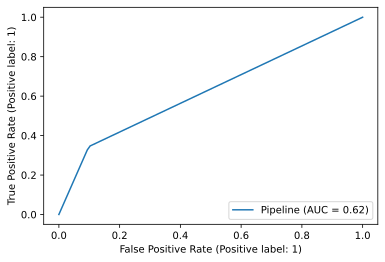

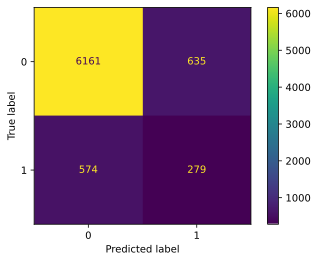

In [524]:
RocCurveDisplay.from_estimator(pipe, X_test, y_test)
plt.show()

ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test);

In [525]:
transformer = Normalizer().fit(X_train)
transformer.transform(X_test)

clf =  DecisionTreeClassifier(random_state=12)
clf.fit(X_train, y_train)  # apply scaling on training data

threshold = 0.02
important_features = {}

for n in range(len(X.columns)):
    #print(X.columns[n], clf.feature_importances_[n])
    if clf.feature_importances_[n] > threshold:
        important_features[X.columns[n]] = clf.feature_importances_[n]
        
important_features

{'age': 0.15737980625316866,
 'campaign': 0.08702218530659048,
 'pdays': 0.03564283576996345,
 'cons.conf.idx': 0.023317534268141104,
 'euribor3m': 0.08323765491017307,
 'nr.employed': 0.16091095413373088,
 'housing_no': 0.02257273306925594,
 'housing_yes': 0.024757329458853235}

### Part 3c Support Vector Machines

Using SVC with a radial kernel

In [440]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# SVC With No SCaling
svc = SVC(max_iter=50000)
svc.fit(X_train,  y_train)
y_test_pred = svc.predict(X_test)
print(f"No Scaling Accuracy: {svc.score(X_test, y_test):.5}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

print(" -- SVC With Scaling -- ")
for p in [Normalizer(), StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler(), QuantileTransformer()]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    pipe = make_pipeline(p, SVC(max_iter=50000))
    pipe.fit(X_train, y_train)  # apply scaling on training data
    transformer = p.fit(X_train) 
    transformer.transform(X_test) # apply scaling learned on train data to test data
    y_test_pred = pipe.predict(X_test)
    print(f"{str(p)[:-2]} Accuracy: {pipe.score(X_test, y_test):.5}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

No Scaling Accuracy: 0.89567, f1_score: 0.28495, recall: 0.1864
 -- SVC With Scaling -- 
Normalizer Accuracy: 0.89567, f1_score: 0.28495, recall: 0.1864


/Users/Wee-YO/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


StandardScaler Accuracy: 0.8958, f1_score: 0.32856, recall: 0.2286
RobustScaler Accuracy: 0.89567, f1_score: 0.28495, recall: 0.1864


/Users/Wee-YO/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MinMaxScaler Accuracy: 0.89711, f1_score: 0.28259, recall: 0.1817


/Users/Wee-YO/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MaxAbsScaler Accuracy: 0.89593, f1_score: 0.27505, recall: 0.1770


/Users/Wee-YO/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


QuantileTransformer Accuracy: 0.89672, f1_score: 0.28182, recall: 0.1817


#### Best SVM Classifier

Using Standard Scaler

In [481]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

pipe = make_pipeline(StandardScaler(), SVC(max_iter=50000))
pipe.fit(X_train, y_train)  # apply scaling on training data
transformer = p.fit(X_train) 
transformer.transform(X_test) # apply scaling learned on train data to test data
y_test_pred = pipe.predict(X_test)
y_train_predict = pipe.predict(X_train)

print(f"Standard Scaler SVM Train Set Accuracy Score: {pipe.score(X_train, y_train_predict):.5f}, f1_score: {f1_score(y_train, y_train_predict):.5f}, recall: {recall_score(y_train, y_train_predict):.4f}")
print(f"Standard Scaler SVM Test Set Accuracy Score: {pipe.score(X_test, y_test):.5f}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

Standard Scaler SVM Train Set Accuracy Score: 1.00000, f1_score: 0.44585, recall: 0.3095
Standard Scaler SVM Test Set Accuracy Score: 0.89580, f1_score: 0.32856, recall: 0.2286


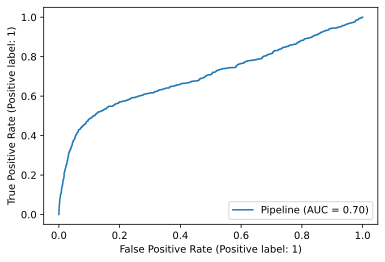

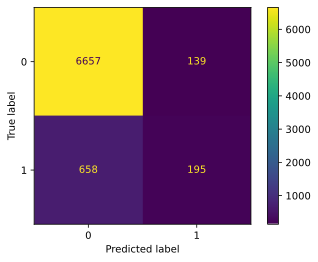

In [483]:
RocCurveDisplay.from_estimator(pipe, X_test, y_test)
plt.show()

ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test);

### Part 3d Random Forest Ensemble Classifier

In [552]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Random Forest Classifier No SCaling
rfc = RandomForestClassifier(random_state=12)
rfc.fit(X_train,  y_train)
y_test_pred = rfc.predict(X_test)
print(f"No Scaling Accuracy: {rfc.score(X_test, y_test):.5}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

print(" -- Random Forest Ensemble Classifier With Scaling -- ")
for p in [Normalizer(), StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler(), QuantileTransformer(), PowerTransformer()]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    pipe = make_pipeline(p, RandomForestClassifier(random_state=12))
    pipe.fit(X_train, y_train)  # apply scaling on training data
    transformer = p.fit(X_train) 
    transformer.transform(X_test) # apply scaling learned on train data to test data
    y_test_pred = pipe.predict(X_test)
    print(f"{str(p)[:-2]} Accuracy: {pipe.score(X_test, y_test):.5}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

No Scaling Accuracy: 0.88757, f1_score: 0.33333, recall: 0.2521
 -- Random Forest Ensemble Classifier With Scaling -- 
Normalizer Accuracy: 0.88822, f1_score: 0.34281, recall: 0.2614
StandardScaler Accuracy: 0.88717, f1_score: 0.33153, recall: 0.2509
RobustScaler Accuracy: 0.88744, f1_score: 0.33411, recall: 0.2532
MinMaxScaler Accuracy: 0.88744, f1_score: 0.33308, recall: 0.2521
MaxAbsScaler Accuracy: 0.88744, f1_score: 0.33308, recall: 0.2521
QuantileTransformer Accuracy: 0.88731, f1_score: 0.33282, recall: 0.2521
PowerTransformer Accuracy: 0.88914, f1_score: 0.34869, recall: 0.2661


#### Best Random Forest Classifier

Using Power Transformation

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

pipe = make_pipeline(PowerTransformer(), RandomForestClassifier(random_state=12))
pipe.fit(X_train, y_train)  # apply scaling on training data
transformer = p.fit(X_train) 
transformer.transform(X_test) # apply scaling learned on train data to test data
y_test_pred = pipe.predict(X_test)
x_train_predict = pipe.predict(X_train)

print(f"Power Transformed Random Forest Train Set Accuracy Score: {pipe.score(X_train, x_train_predict):.5f}, f1_score: {f1_score(y_train, y_train_predict):.5f}, recall: {recall_score(y_train, y_train_predict):.4f}")
print(f"Power Transformed Random Forest Test Set Accuracy Score: {pipe.score(X_test, y_test):.5f}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

Power Transformed Random Forest Train Set Accuracy Score: 1.00000, f1_score: 0.97553, recall: 0.9542
Power Transformed Random Forest Test Set Accuracy Score: 0.88914, f1_score: 0.34869, recall: 0.2661


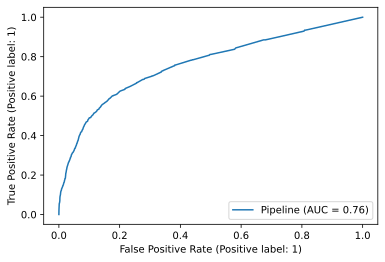

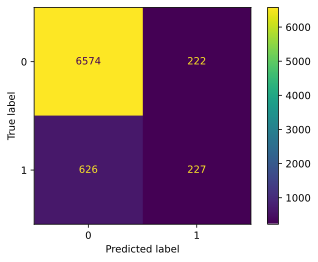

In [554]:
RocCurveDisplay.from_estimator(pipe, X_test, y_test)
plt.show()

ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test);

### Part 4 Hyperparameter Tuning 

Because Random Forests and other Tree-based methods can overfit very easily, we're going to try some hyperparameter tuning using max_depth.

#### Random Forest Classifier

In [559]:
depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]

f1_test = []
recall_test = []
f1_train = []
recall_train = []

for n in depths:
    pipe = make_pipeline(Normalizer(), RandomForestClassifier(random_state=12, max_depth=n))
    pipe.fit(X_train, y_train)
    y_test_pred = pipe.predict(X_test)
    y_train_pred = pipe.predict(X_train)
    f1_test.append(f1_score(y_test, y_test_pred))
    recall_test.append(recall_score(y_test, y_test_pred))
    f1_train.append(f1_score(y_train, y_train_pred))
    recall_train.append(recall_score(y_train, y_train_pred))

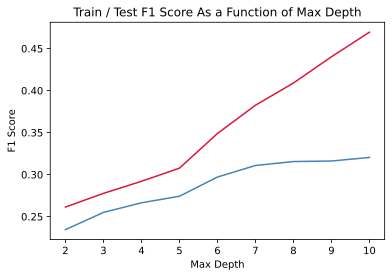

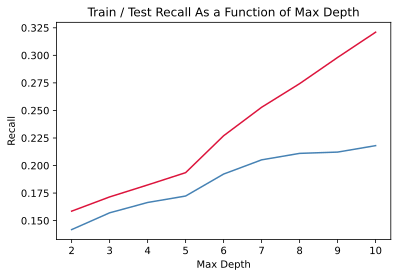

In [564]:
plt.title('Train / Test F1 Score As a Function of Max Depth')
plt.plot(depths, f1_test, color='steelblue')
plt.plot(depths, f1_train, color='crimson')
plt.ylabel('F1 Score')
plt.xlabel('Max Depth')
plt.show()

plt.title('Train / Test Recall As a Function of Max Depth')
plt.plot(depths, recall_test, color='steelblue')
plt.plot(depths, recall_train, color='crimson')
plt.ylabel('Recall')
plt.xlabel('Max Depth')
plt.show()

In [567]:
pipe = make_pipeline(Normalizer(), RandomForestClassifier(random_state=12, max_depth=6))
pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

print(f"Power Transformed Random Forest Train Set Accuracy Score: {pipe.score(X_train, y_train_pred):.5f}, f1_score: {f1_score(y_train, y_train_pred):.5f}, recall: {recall_score(y_train, y_train_pred):.4f}")
print(f"Power Transformed Random Forest Test Set Accuracy Score: {pipe.score(X_test, y_test):.5f}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

Power Transformed Random Forest Train Set Accuracy Score: 1.00000, f1_score: 0.34891, recall: 0.2270
Power Transformed Random Forest Test Set Accuracy Score: 0.89855, f1_score: 0.29710, recall: 0.1923


#### Decision Tree Classifier

Using Cost Complexity Alpha Pruning. Earlier we saw that the Decision Tree Classifier was very much overfit to the trinaing data, so we'll see if we can get less overfitting with pruning and what the resulting model looks like. 

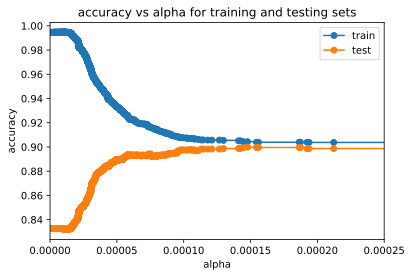

In [495]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

clf = DecisionTreeClassifier(random_state=12)
transformer = Normalizer().fit(X_train)
transformer.transform(X_train)
transformer.transform(X_test)
clf.fit(X_train, y_train)  

path = clf.cost_complexity_pruning_path(X_train,y_train) #post pruning
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = [] 

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=12, ccp_alpha=ccp_alpha)
    transformer = Normalizer().fit(X_train)
    transformer.transform(X_train)
    transformer.transform(X_test)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
train_scores = []
test_scores = []

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.xlim(0, 0.00025)
plt.show() 

In [570]:
clf = DecisionTreeClassifier(random_state=12, ccp_alpha=0.0001)
transformer = Normalizer().fit(X_train)
transformer.transform(X_train)
transformer.transform(X_test)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_predict = clf.predict(X_train)

print(f"Power Transformed Decision Tree Train Set Accuracy Score: {pipe.score(X_train, x_train_predict):.5f}, f1_score: {f1_score(y_train, y_train_predict):.5f}, recall: {recall_score(y_train, y_train_predict):.4f}")
print(f"Power Transformed Decision Tree Test Set Accuracy Score: {pipe.score(X_test, y_test):.5f}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

Power Transformed Decision Tree Train Set Accuracy Score: 0.97905, f1_score: 0.39710, recall: 0.2734
Power Transformed Decision Tree Test Set Accuracy Score: 0.89855, f1_score: 0.32762, recall: 0.2239


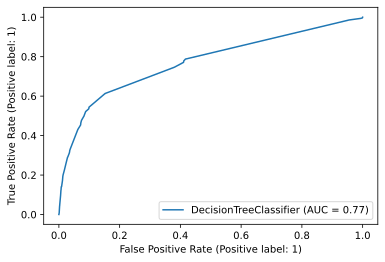

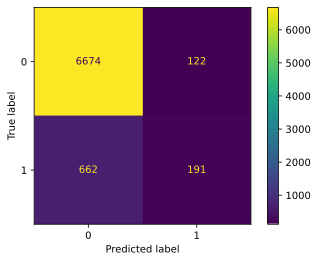

In [569]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

### Training on Reduced Features

To train a better Tree-based classifer, we can reduce the number of features to just the ones we saw were important in Part 3b

In [572]:
features_to_keep = ['age', 'campaign', 'pdays', 'euribor3m', 'nr.employed', 'contact_cellular', 'poutcome_success', 'housing_no', 'housing_yes']

X_reduced = df[features_to_keep]
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=12)

pipe = make_pipeline(PowerTransformer(), RandomForestClassifier(random_state=12, max_depth = 4))
pipe.fit(X_train, y_train)  # apply scaling on training data
transformer = p.fit(X_train) 
transformer.transform(X_test) # apply scaling learned on train data to test data
y_test_pred = pipe.predict(X_test)
x_train_predict = pipe.predict(X_train)

print(f"Reduced Feature Power Transformed Random Forest Train Set Accuracy Score: {pipe.score(X_train, x_train_predict):.5f}, f1_score: {f1_score(y_train, y_train_predict):.5f}, recall: {recall_score(y_train, y_train_predict):.4f}")
print(f"Reduced Feature Power Transformed Random Forest Test Set Accuracy Score: {pipe.score(X_test, y_test):.5f}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

Reduced Feature Power Transformed Random Forest Train Set Accuracy Score: 1.00000, f1_score: 0.39710, recall: 0.2734
Reduced Feature Power Transformed Random Forest Test Set Accuracy Score: 0.89790, f1_score: 0.26529, recall: 0.1653


In [573]:
pipe = make_pipeline(Normalizer(), DecisionTreeClassifier(random_state=12, ccp_alpha=0.0001))
pipe.fit(X_train, y_train)  # apply scaling on training data
transformer = p.fit(X_train) 
transformer.transform(X_test) # apply scaling learned on train data to test data
y_test_pred = pipe.predict(X_test)
x_train_predict = pipe.predict(X_train)

print(f"Reduced Feature Normalized Decision Tree Train Set Accuracy Score: {pipe.score(X_train, x_train_predict):.5f}, f1_score: {f1_score(y_train, y_train_predict):.5f}, recall: {recall_score(y_train, y_train_predict):.4f}")
print(f"Reduced Feature Normalized Decision Tree Test Set Accuracy Score: {pipe.score(X_test, y_test):.5f}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")

Reduced Feature Normalized Decision Tree Train Set Accuracy Score: 1.00000, f1_score: 0.39710, recall: 0.2734
Reduced Feature Normalized Decision Tree Test Set Accuracy Score: 0.89358, f1_score: 0.30427, recall: 0.2087


### Final Model Selection

In [584]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

pipe = make_pipeline(Normalizer(), DecisionTreeClassifier(random_state=12, ccp_alpha=0.0001))
pipe.fit(X_train, y_train)  
transformer = Normalizer().fit(X_train) 
# apply scaling learned on train data to test data
transformer.transform(X_test)
y_test_pred = pipe.predict(X_test)
y_train_predict = pipe.predict(X_train)

print(f"Normalized Decision Tree Train Set Accuracy Score: {pipe.score(X_train, y_train_predict):.5f}, f1_score: {f1_score(y_train, y_train_predict):.5f}, recall: {recall_score(y_train, y_train_predict):.4f}")
print(f"Normalized Decision Tree Test Set Accuracy Score: {pipe.score(X_test, y_test):.5f}, f1_score: {f1_score(y_test, y_test_pred):.5f}, recall: {recall_score(y_test, y_test_pred):.4f}")


Normalized Decision Tree Train Set Accuracy Score: 1.00000, f1_score: 0.41511, recall: 0.2905
Normalized Decision Tree Test Set Accuracy Score: 0.89580, f1_score: 0.33749, recall: 0.2380


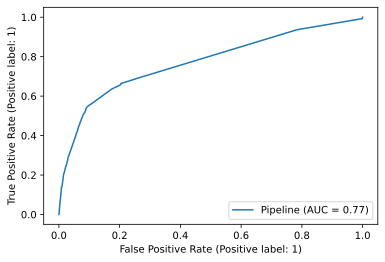

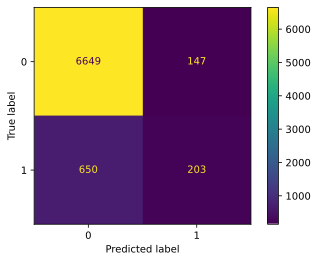

In [585]:
RocCurveDisplay.from_estimator(pipe, X_test, y_test)
plt.show()

ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test);

### Part 5: Results and Conclusions

Best model of those tried is a Decision Tree Classifier with cost complexity pruning to avoid oerfitting to training data (ccp_alpha=0.0001). Of the various normalization routnes I looked at standard scaling and normalization seemed to give the best results, with the Power Transformation method producing good results in some cases. Most other models were either not very accurate/had low recall or were too overfit to the training data. Recall or F1 score is probably the most suitable measure of performance in this situation as the point is to identify customers who are more likely to subscribe to the Term Loan Certificate more so than to predict will maximum accuracy. Even the best classifiers I built here were only slightly more accurate than random chance. 


Thee are many more things I could do to try to bettter fit a model to this data. For instance better feature selection or feature engineering, hyperparameter tuning of the Support Vector Machines Models and trying more sophisticated models like neural networks or a boosted classifier.
A few other sources I've looked at for this project (listed below) do more sophisticated things like create synthetic training data to balance the target variable classes to have more positive examples, fit neural networks and make the data a time series analysis with a rolling window to account for changing behavior over time. 


#### References and Links

[Github Link to this Notebook]

[Dataset Page on UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

[Article](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8) on fitting a Logistic Regression Classifier to this Dataset

[Academic Paper](https://www.sciencedirect.com/science/article/abs/pii/S016792361400061X) looking at sophisticated ways of fitting accurate models to this Dataset